In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=np.load("/content/drive/My Drive/Colab Notebooks/X.npy")
labels=np.load("/content/drive/My Drive/Colab Notebooks/y.npy")

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(data, labels,test_size=0.15, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.15, stratify=y_train)

In [ ]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,
                         width_shift_range=0.2,height_shift_range=0.2,
                         shear_range=0.15,horizontal_flip=True,
                         fill_mode="nearest")

In [ ]:
# initialize the initial learning rate, number of epochs to train for,and batch size
INIT_LR = 1e-3
EPOCHS = 40
BS = 128

model=Sequential()

#First Convolutional layer with 400 filters of size 3x3, padding enabled
model.add(Conv2D( filters=400, kernel_size=(3,3),input_shape=data.shape[1:], activation='relu', padding='same'))

#Max Pooling with filter of size 2x2
model.add(MaxPooling2D(pool_size=(2,2)))

#Second Convolutional layer with 200 filters of size 3x3
model.add(Conv2D( filters=200, kernel_size=(3,3), activation='relu'))

#Max Pooling with filter of size 2x2
model.add(MaxPooling2D(pool_size=(2,2)))

#Third Convolutional layer with 200 filters of size 3x3
model.add(Conv2D( filters=200, kernel_size=(3,3), activation='relu'))

#Max Pooling with filter of size 2x2
model.add(MaxPooling2D(pool_size=(2,2)))

#Fourth Convolutional layer with 200 filters of size 3x3
model.add(Conv2D( filters=100, kernel_size=(3,3),activation='relu'))

#Max Pooling with filter of size 2x2
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer

model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

opt = tf.keras.optimizers.Adam(lr=INIT_LR)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

history = model.fit(aug.flow(X_train, y_train, batch_size=BS),
              steps_per_epoch=len(X_train) // BS,
              validation_data=(X_val, y_val),
              validation_steps=len(X_val) // BS,
              epochs=EPOCHS)

Epoch 1/40
30/30 [==============================] - 882s 29s/step - loss: 0.7020 - accuracy: 0.5070 - val_loss: 0.6918 - val_accuracy: 0.5095
Epoch 2/40
30/30 [==============================] - 878s 29s/step - loss: 0.6766 - accuracy: 0.5654 - val_loss: 0.6241 - val_accuracy: 0.6652
Epoch 3/40
30/30 [==============================] - 877s 29s/step - loss: 0.6357 - accuracy: 0.6247 - val_loss: 0.6867 - val_accuracy: 0.5404
Epoch 4/40
30/30 [==============================] - 879s 29s/step - loss: 0.6705 - accuracy: 0.5957 - val_loss: 0.6392 - val_accuracy: 0.5991
Epoch 5/40
30/30 [==============================] - 887s 30s/step - loss: 0.6333 - accuracy: 0.6282 - val_loss: 0.5687 - val_accuracy: 0.7063
Epoch 6/40
30/30 [==============================] - 891s 30s/step - loss: 0.5873 - accuracy: 0.6748 - val_loss: 0.5013 - val_accuracy: 0.7885
Epoch 7/40
30/30 [==============================] - 891s 30s/step - loss: 0.5875 - accuracy: 0.6912 - val_loss: 0.5507 - val_accuracy: 0.7225
Epoch 

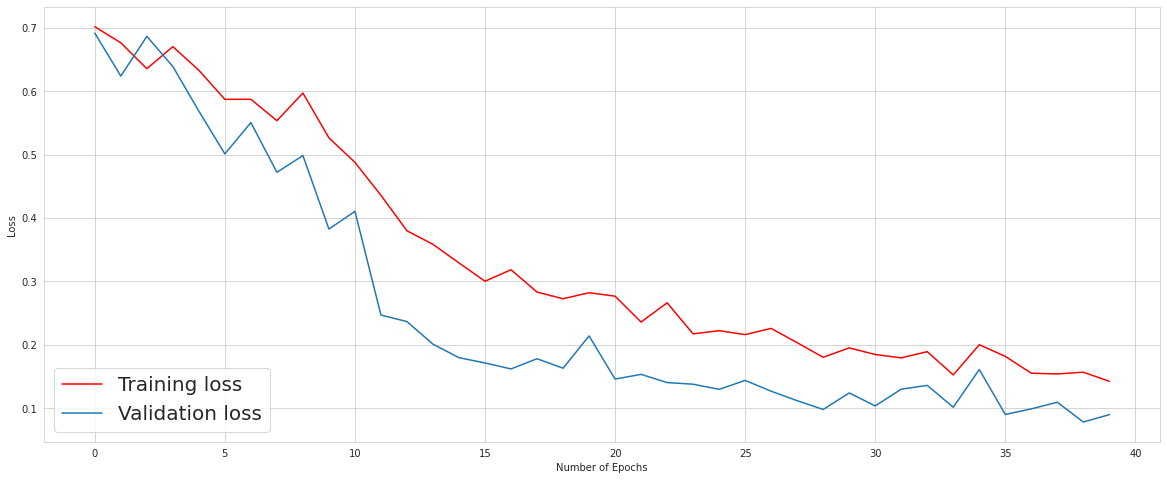

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'],'r',label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend(loc=3, prop={'size': 20})
plt.show()

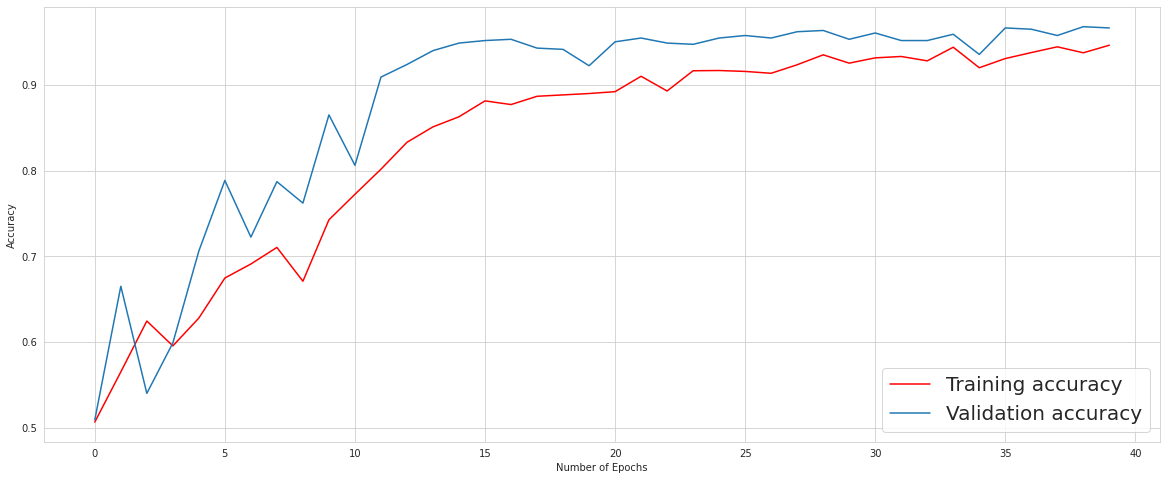

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'],'r',label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=4, prop={'size': 20})
plt.show()

In [ ]:
y_pred = model.predict(X_test, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
y_pred = np.argmax(y_pred, axis=1)

# show a nicely formatted classification report
print(classification_report(y_test.argmax(axis=1), y_pred,target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       402
           1       0.94      0.98      0.96       400

    accuracy                           0.96       802
   macro avg       0.96      0.96      0.96       802
weighted avg       0.96      0.96      0.96       802



In [ ]:
l=model.evaluate(X_test,y_test)
print("Loss: ", l[0]*100, "%")
print("Accuracy: ", l[1]*100, "%")

In [ ]:
model.save("/content/drive/My Drive/Colab Notebooks/model-017.model")